# Récupérer les données Velib (JCDecaux) et les visualiser

La société [JCDecaux](http://www.jcdecaux.com/fr/pour-nos-partenaires/velos-en-libre-service) met à disoposition les données Velib pour toutes les villes dont il gère le service (Besançon, Nantes, Lyon, ...). Les données sont accessibles en temps réel via une API assez simple : [JCDecaux Developer](https://developer.jcdecaux.com/#/home). Le module [manydataapi](http://www.xavierdupre.fr/app/manydataapi/helpsphinx/index.html) inclut désormais la classe [DataCollectJCDecaux](http://www.xavierdupre.fr/app/manydataapi/helpsphinx/manydataapi/velib/data_jcdecaux.html?highlight=velib#velib.data_jcdecaux.DataCollectJCDecaux) qui permet de récupérer ces données et d'effectuer quelques traitements simples.

Tout d'abord, il est nécessaire d'obtenir une clé en vous enregistrant sur le site de JCDecaux : [Votre compte développeur](https://developer.jcdecaux.com/#/signup). Le code suivant permet de récupérer des données pendant 5 minutes :

In [1]:
%matplotlib inline

In [2]:
from manydataapi.velib import DataCollectJCDecaux
import os
import datetime
folder = os.path.abspath("data_velib")
if not os.path.exists(folder):
    os.makedirs(folder)

In [3]:
import keyring
key = keyring.get_password("velib", "manydataapi,key")

In [4]:
stop = datetime.datetime.now() + datetime.timedelta(minutes=2)
stop

datetime.datetime(2019, 6, 8, 11, 41, 42, 472087)

In [5]:
DataCollectJCDecaux.run_collection(key, contract="besancon",
            folder_file=os.path.join(folder, "besancon"), stop_datetime=stop,
            delayms=20000)  # remplacer par None pour récupérer les données sans s'arrêter

DataCollectJCDecaux.collecting_data: nb=1 2019-06-08 11:39:42.712536 delay=0:00:20
DataCollectJCDecaux.collecting_data: nb=2 2019-06-08 11:40:03.329307 delay=0:00:20
DataCollectJCDecaux.collecting_data: nb=3 2019-06-08 11:40:23.218483 delay=0:00:20
DataCollectJCDecaux.collecting_data: nb=4 2019-06-08 11:40:43.474764 delay=0:00:20
DataCollectJCDecaux.collecting_data: nb=5 2019-06-08 11:41:03.346586 delay=0:00:20
DataCollectJCDecaux.collecting_data: nb=6 2019-06-08 11:41:23.215681 delay=0:00:20


On liste les fichiers dans le répertoire :

In [6]:
os.listdir(folder)

['besancon.2019-03-09_11-24-11.683780.txt',
 'besancon.2019-03-09_11-24-32.348985.txt',
 'besancon.2019-03-09_11-24-52.274777.txt',
 'besancon.2019-03-09_11-25-12.248416.txt',
 'besancon.2019-03-09_11-25-32.187105.txt',
 'besancon.2019-03-09_11-25-52.203976.txt',
 'besancon.2019-04-04_01-31-03.090776.txt',
 'besancon.2019-04-04_01-31-23.694889.txt',
 'besancon.2019-04-04_01-31-43.533015.txt',
 'besancon.2019-04-04_01-32-03.824015.txt',
 'besancon.2019-04-04_01-32-23.730851.txt',
 'besancon.2019-04-04_01-32-43.578783.txt',
 'besancon.2019-06-08_11-01-55.687069.txt',
 'besancon.2019-06-08_11-02-16.310015.txt',
 'besancon.2019-06-08_11-02-36.256942.txt',
 'besancon.2019-06-08_11-02-56.211805.txt',
 'besancon.2019-06-08_11-03-16.204509.txt',
 'besancon.2019-06-08_11-03-36.229623.txt',
 'besancon.2019-06-08_11-21-09.267587.txt',
 'besancon.2019-06-08_11-21-29.748227.txt',
 'besancon.2019-06-08_11-21-49.927647.txt',
 'besancon.2019-06-08_11-22-09.988129.txt',
 'besancon.2019-06-08_11-22-29.7

On construit un DataFrame à partir de ces données :

In [7]:
df = DataCollectJCDecaux.to_df(folder, "^besancon.*[.]txt")
df.to_csv(os.path.join(folder, "resume_besancon.txt"), sep="\t", index=False, encoding="utf8")
df.to_excel(os.path.join(folder, "resume_besancon.xlsx"), index=False)
df[["name","lng", "lat", "collect_date", "available_bike_stands", "available_bikes", "file"]].head()

,name,lng,lat,collect_date,available_bike_stands,available_bikes,file
0,16 - BEAUREGARD,6.032438,47.245026,2019-03-09 11:24:11.830996,5,6,besancon.2019-03-09_11-24-11.683780.txt
1,30 - XAVIER MARMIER,6.006690,47.241256,2019-03-09 11:24:11.830996,11,1,besancon.2019-03-09_11-24-11.683780.txt
2,02 - SQUARE BOUCHOT,6.022070,47.242990,2019-03-09 11:24:11.830996,1,9,besancon.2019-03-09_11-24-11.683780.txt
3,26 - BERSOT,6.029520,47.238861,2019-03-09 11:24:11.830996,7,3,besancon.2019-03-09_11-24-11.683780.txt
4,14 - JACOBINS,6.033465,47.234142,2019-03-09 11:24:11.830996,7,3,besancon.2019-03-09_11-24-11.683780.txt


On visualise les données pour une date donnée :

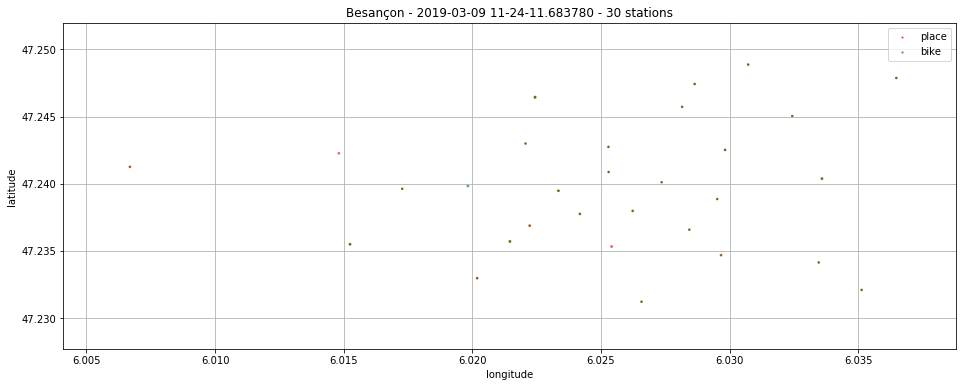

In [8]:
dt = df["file"][0]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataCollectJCDecaux.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","") \
                    .replace(".txt","").replace("_", " "), len(subset)));

On crée une petite animation avec les données velib :

In [9]:
import matplotlib.animation as animation
anim = DataCollectJCDecaux.animation(df, interval = 100, figsize=(16,6))

In [10]:
from IPython.display import HTML
# Ne marche pas vraiment sur une aussi petite durée
# HTML(anim.to_jshtml())

On essaye autrement.

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


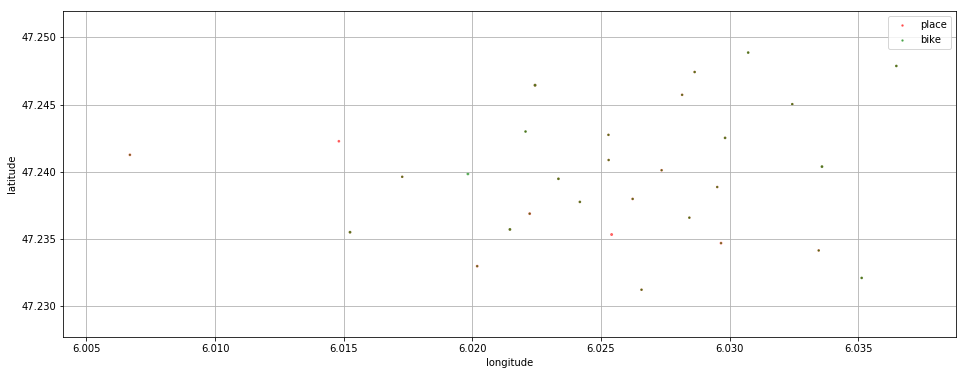

In [11]:
anim = DataCollectJCDecaux.animation(df[-1000:], interval = 100, figsize=(16,6), module="moviepy")

In [12]:
# anim.write_gif("anim1.gif", fps=20)
# from IPython.display import Image, display, HTML
# Image(url='anim1.gif') # does not work all the time
# HTML('''<div style="display: flex; justify-content: row;"><img src="anim1.gif"></div>''');

Ca ne bouge pas trop. Sur deux minutes, c'est plutôt attendu. On essaye sur plus de données.

In [13]:
from pyensae.datasource import download_data
import pandas
download_data('besancon.df.txt.zip', website = 'xdtd')  

['besancon.df.txt']

In [14]:
df = pandas.read_csv("besancon.df.txt", sep="\t", encoding="utf8")
df.shape

(22650, 15)

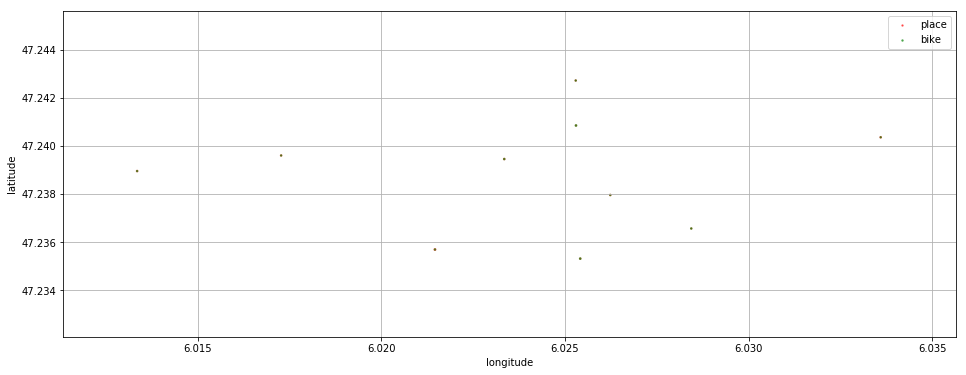

In [15]:
from manydataapi.velib import DataCollectJCDecaux
anim = DataCollectJCDecaux.animation(df[-1000:], interval=100, figsize=(16,6), module="moviepy")

In [16]:
# anim.write_gif("anim2.gif", fps=20)
# Image('anim2.gif')
# HTML('''<div style="display: flex; justify-content: row;"><img src="anim2.gif"></div>''');

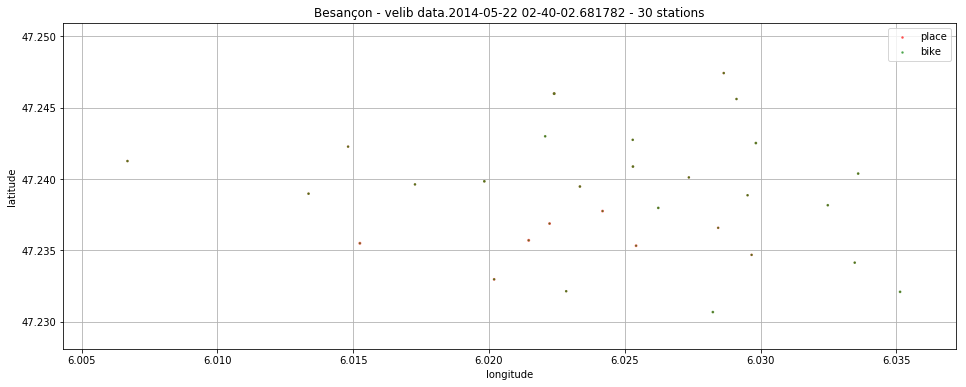

In [17]:
# première image des données
dt = df["file"][0]
subset = df[df["file"] == dt]
fig,ax,plt = DataCollectJCDecaux.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","") \
                .replace(".txt","").replace("_", " "), len(subset)));

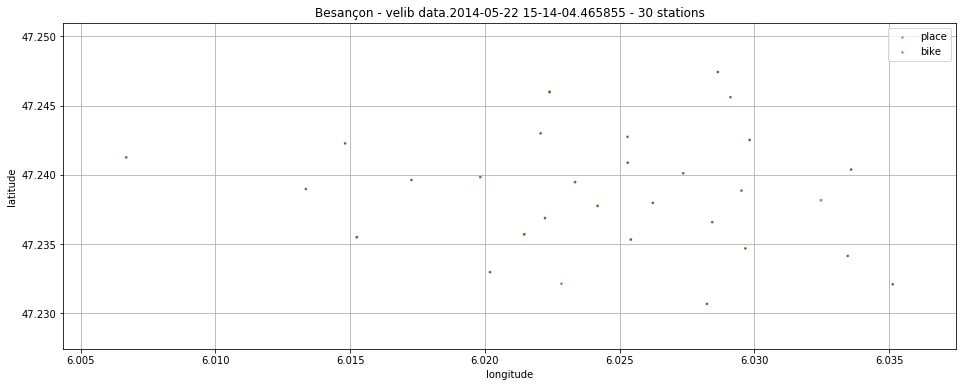

In [18]:
# dernière image
dt = df["file"][len(df)-1]
subset = df [ df["file"] == dt ]
fig,ax,plt = DataCollectJCDecaux.draw(subset, figsize=(16,6))
ax.set_title("Besançon - {0} - {1} stations".format(dt.replace("besancon.","") \
                            .replace(".txt","").replace("_", " "), len(subset)));

Vous trouverez un exemple d'utilisation de ces données ici [Coding Party 22 mai 2014 : inférer des trajectoires de vélos](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/coding_party_1.html) et là [Déterminer la vitesse moyenne des vélib](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/expose_velib.html).

In [19]:
DataCollectJCDecaux.draw(subset, use_folium=True, size=0.1)